In [1]:
# This tutorial will briefly show the main components of the aerodynamic reduced order model.
# We will create the database, create the physical model, and finally use them to plot the training signal
# that has been used, and the corresponding lift coefficient obtained.
# We will also plot the main PODs of the surface flow to understand how to manipulate the main data.
# After the completion of this tutorial you should be able to manipulate the training data to extract and
# plot quantities of interest.
# The test case is the first case of the aeroelastic prediction workshop. Thus, we have the BSCW with a Mach
# number of 0.74

In [2]:
# First, we perform the aerodynamic simulation with SU2. Please refer to the tutorial at 
# https://su2code.github.io/tutorials/Dynamic_FSI_Python/ for more details.

In [3]:
# Assuming that we correctly configured the SU2 simulation, we now have this list of output files:
# 1) The StructHistoryModal.dat file, containing the structural inputs that we provided to the system
# 2) A set of surface_flow.csv files, containing the aerodynamic solution at each time step of the training process

In [4]:
# Second, we launch again the same aerodynamic simulation, this time including the keyword "MAPPING_MODES = YES" in
# solid.cfg file. This will not actually run the simulation, but only print the normals and the modal shapes.

In [5]:
# If everything was correctly configured, we now have these files:
# 1) A file called Normals.csv, containing the normal to all the surface cells. Please note that the norm of these normals
# correspond to the area of the cell
# 2) A file called Undeformed.csv, containing the position of the cells in the undeformed configuration
# 3) A se of files called Mode.csv, containing the positions of the cells for the different modal shapes

In [6]:
# We are now ready to build our database.

# import the aerodynamic module
import os
os.chdir("..")
import aerodynamics
os.chdir("Tutorials")

# location of the structural history file
stru_history = "data/blendedStep/StructHistoryModal.dat"

# location of the aerodynamic history files
aero_history = "data/blendedStep/surface_flow.csv"
# note that all the files are called surface_flow_00xxx.csv, with xxx the time iteration
# it is sufficient to put the main name, the code will then scan for the requested time iterations

In [7]:
# creation of the database
database = aerodynamics.database(stru_history,aero_history)

Creating the database for the reduced order model.
Importing the data from the files.
Opened structural history file /mnt/d/Desktop/PhD/pysu2DMD/blendedStep/StructHistoryModal.dat.
Completed reading
Starting the reading of surface_flow.csv files.
Opened time iter 199, last time iter is 1099
Opened time iter 200, last time iter is 1099
Opened time iter 201, last time iter is 1099
Opened time iter 202, last time iter is 1099
Opened time iter 203, last time iter is 1099
Opened time iter 204, last time iter is 1099
Opened time iter 205, last time iter is 1099
Opened time iter 206, last time iter is 1099
Opened time iter 207, last time iter is 1099
Opened time iter 208, last time iter is 1099
Opened time iter 209, last time iter is 1099
Opened time iter 210, last time iter is 1099
Opened time iter 211, last time iter is 1099
Opened time iter 212, last time iter is 1099
Opened time iter 213, last time iter is 1099
Opened time iter 214, last time iter is 1099
Opened time iter 215, last time i

Opened time iter 376, last time iter is 1099
Opened time iter 377, last time iter is 1099
Opened time iter 378, last time iter is 1099
Opened time iter 379, last time iter is 1099
Opened time iter 380, last time iter is 1099
Opened time iter 381, last time iter is 1099
Opened time iter 382, last time iter is 1099
Opened time iter 383, last time iter is 1099
Opened time iter 384, last time iter is 1099
Opened time iter 385, last time iter is 1099
Opened time iter 386, last time iter is 1099
Opened time iter 387, last time iter is 1099
Opened time iter 388, last time iter is 1099
Opened time iter 389, last time iter is 1099
Opened time iter 390, last time iter is 1099
Opened time iter 391, last time iter is 1099
Opened time iter 392, last time iter is 1099
Opened time iter 393, last time iter is 1099
Opened time iter 394, last time iter is 1099
Opened time iter 395, last time iter is 1099
Opened time iter 396, last time iter is 1099
Opened time iter 397, last time iter is 1099
Opened tim

Opened time iter 559, last time iter is 1099
Opened time iter 560, last time iter is 1099
Opened time iter 561, last time iter is 1099
Opened time iter 562, last time iter is 1099
Opened time iter 563, last time iter is 1099
Opened time iter 564, last time iter is 1099
Opened time iter 565, last time iter is 1099
Opened time iter 566, last time iter is 1099
Opened time iter 567, last time iter is 1099
Opened time iter 568, last time iter is 1099
Opened time iter 569, last time iter is 1099
Opened time iter 570, last time iter is 1099
Opened time iter 571, last time iter is 1099
Opened time iter 572, last time iter is 1099
Opened time iter 573, last time iter is 1099
Opened time iter 574, last time iter is 1099
Opened time iter 575, last time iter is 1099
Opened time iter 576, last time iter is 1099
Opened time iter 577, last time iter is 1099
Opened time iter 578, last time iter is 1099
Opened time iter 579, last time iter is 1099
Opened time iter 580, last time iter is 1099
Opened tim

Opened time iter 742, last time iter is 1099
Opened time iter 743, last time iter is 1099
Opened time iter 744, last time iter is 1099
Opened time iter 745, last time iter is 1099
Opened time iter 746, last time iter is 1099
Opened time iter 747, last time iter is 1099
Opened time iter 748, last time iter is 1099
Opened time iter 749, last time iter is 1099
Opened time iter 750, last time iter is 1099
Opened time iter 751, last time iter is 1099
Opened time iter 752, last time iter is 1099
Opened time iter 753, last time iter is 1099
Opened time iter 754, last time iter is 1099
Opened time iter 755, last time iter is 1099
Opened time iter 756, last time iter is 1099
Opened time iter 757, last time iter is 1099
Opened time iter 758, last time iter is 1099
Opened time iter 759, last time iter is 1099
Opened time iter 760, last time iter is 1099
Opened time iter 761, last time iter is 1099
Opened time iter 762, last time iter is 1099
Opened time iter 763, last time iter is 1099
Opened tim

Opened time iter 925, last time iter is 1099
Opened time iter 926, last time iter is 1099
Opened time iter 927, last time iter is 1099
Opened time iter 928, last time iter is 1099
Opened time iter 929, last time iter is 1099
Opened time iter 930, last time iter is 1099
Opened time iter 931, last time iter is 1099
Opened time iter 932, last time iter is 1099
Opened time iter 933, last time iter is 1099
Opened time iter 934, last time iter is 1099
Opened time iter 935, last time iter is 1099
Opened time iter 936, last time iter is 1099
Opened time iter 937, last time iter is 1099
Opened time iter 938, last time iter is 1099
Opened time iter 939, last time iter is 1099
Opened time iter 940, last time iter is 1099
Opened time iter 941, last time iter is 1099
Opened time iter 942, last time iter is 1099
Opened time iter 943, last time iter is 1099
Opened time iter 944, last time iter is 1099
Opened time iter 945, last time iter is 1099
Opened time iter 946, last time iter is 1099
Opened tim

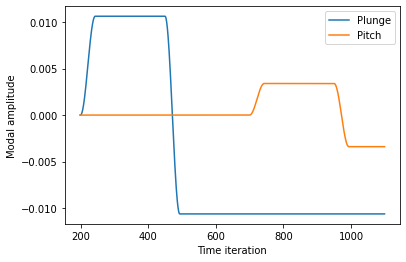

In [8]:
# plot of the training signals, per each mode
import matplotlib.pyplot as plt
nModes = database.U.shape[0]
for i in range(nModes):
    ax = plt.plot(database.timeIter, database.U[i,:]) # Each row is a different mode, each column a time iteration

# just make the plot pretty
plt.xlabel("Time iteration")
plt.ylabel("Modal amplitude")
plt.legend(["Plunge","Pitch"])


In [9]:
# We now want to plot the lift obtained with these inputs
# In order to do so we need a physical model of the system, to connect
# the database, containing a list of pressure values, with the application
# points of these pressures, and the direction of application to the surface
model = aerodynamics.physicalModel("data/Modes/Normals.csv","data/Modes/Mode.csv")
# Note that again we have more mode files, Mode0.csv, Mode1.csv, ecc... so we only give the main name

Creating the physical model.
Importing the data from the files.
Obtaining the normals to the different panels.
Completed reading
Obtaining the mode shapes
Starting with the undeformed condition
Obtain now the deformation due to modes
Opened file 1 of 2
Opened file 2 of 2
Completed reading
Done


Text(0, 0.5, 'Lift [N]')

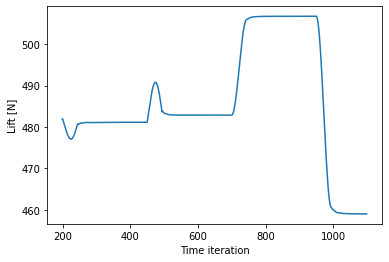

In [10]:
import numpy as np
# plot of the lift
nTimeIter = database.X.shape[1]
lift = []
for i in range(nTimeIter):
    lift = np.append(lift, model.getCl(database.X[:,i]))

plt.plot(database.timeIter, lift)
# just make the plot pretty
plt.xlabel("Time iteration")
plt.ylabel("Lift [N]")


In [11]:
# We will now perform the SVD of the aerodynamic state
U, S, VT, Xmean = database.getShiftedStateSVD()

In [12]:
# The code will automatically apply an optimal threshold to cut the dimension of the matrices, remeber we have 900 snapshots
# so the full dimension is 86840, 900
U.shape

(86840, 345)

Text(0.5, 0, 'Index')

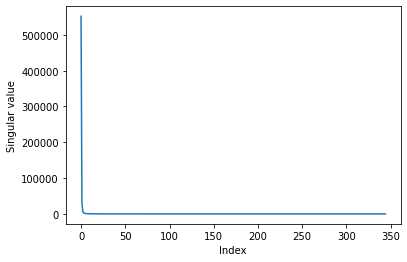

In [13]:
# In order to check the singular values we can plot them
plt.plot(np.diag(S))
plt.ylabel("Singular value")
plt.xlabel("Index")

Text(0.5, 0, 'Index')

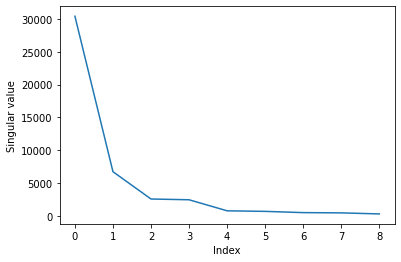

In [14]:
# They actually decrease extremely rapidly. If we focus on the first indices
plt.plot(np.diag(S)[1:10])
plt.ylabel("Singular value")
plt.xlabel("Index")

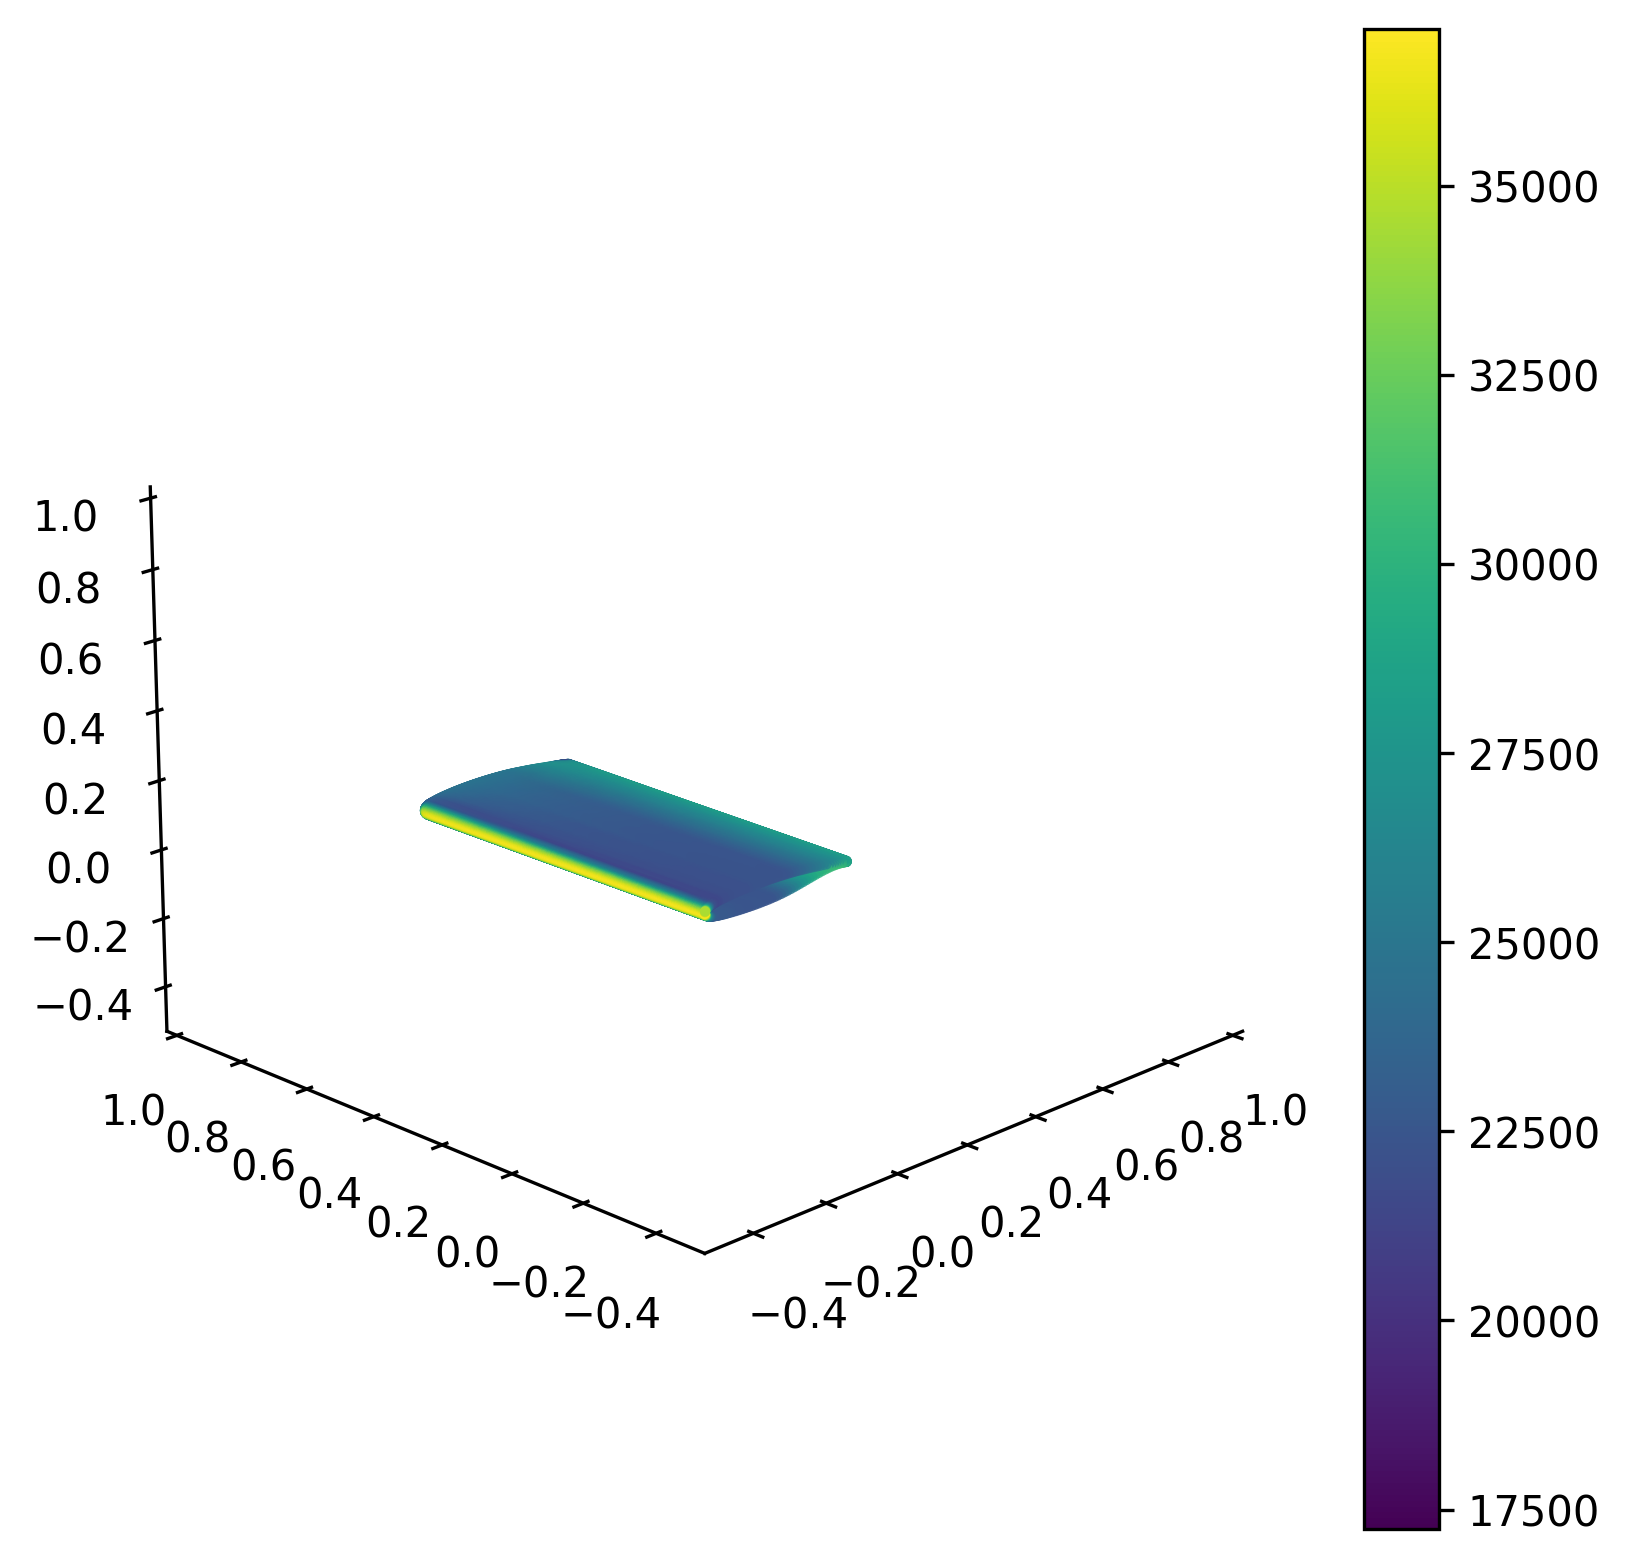

In [15]:
# We will now plot the mean flow
from mpl_toolkits.mplot3d import Axes3D

sizeseq = 2

fig = plt.figure(1, (5,5), dpi=300)
ax = Axes3D(fig)
ax.view_init(20, 225)

# We use the undeformed shape to plot pressure on it
undeformedx = []
undeformedy = []
undeformedz = []
for i in range(len(model.undeformedShape)):
    undeformedx.append(model.undeformedShape[i].ux)
    undeformedy.append(model.undeformedShape[i].uy)
    undeformedz.append(model.undeformedShape[i].uz)

# If we want to plot other modes, we only have to change the index in c = U[:,index]
# Remember the python convention: first element has index 0
p = ax.scatter(undeformedx, undeformedy, undeformedz, c = Xmean, s=sizeseq)

# Set the grid limits
ax.axes.set_xlim3d(left=-0.5, right=1) 
ax.axes.set_ylim3d(bottom=-0.5, top=1) 
ax.axes.set_zlim3d(bottom=-0.5, top=1)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Introduce the colorbar
fig.colorbar(p)

plt.show()

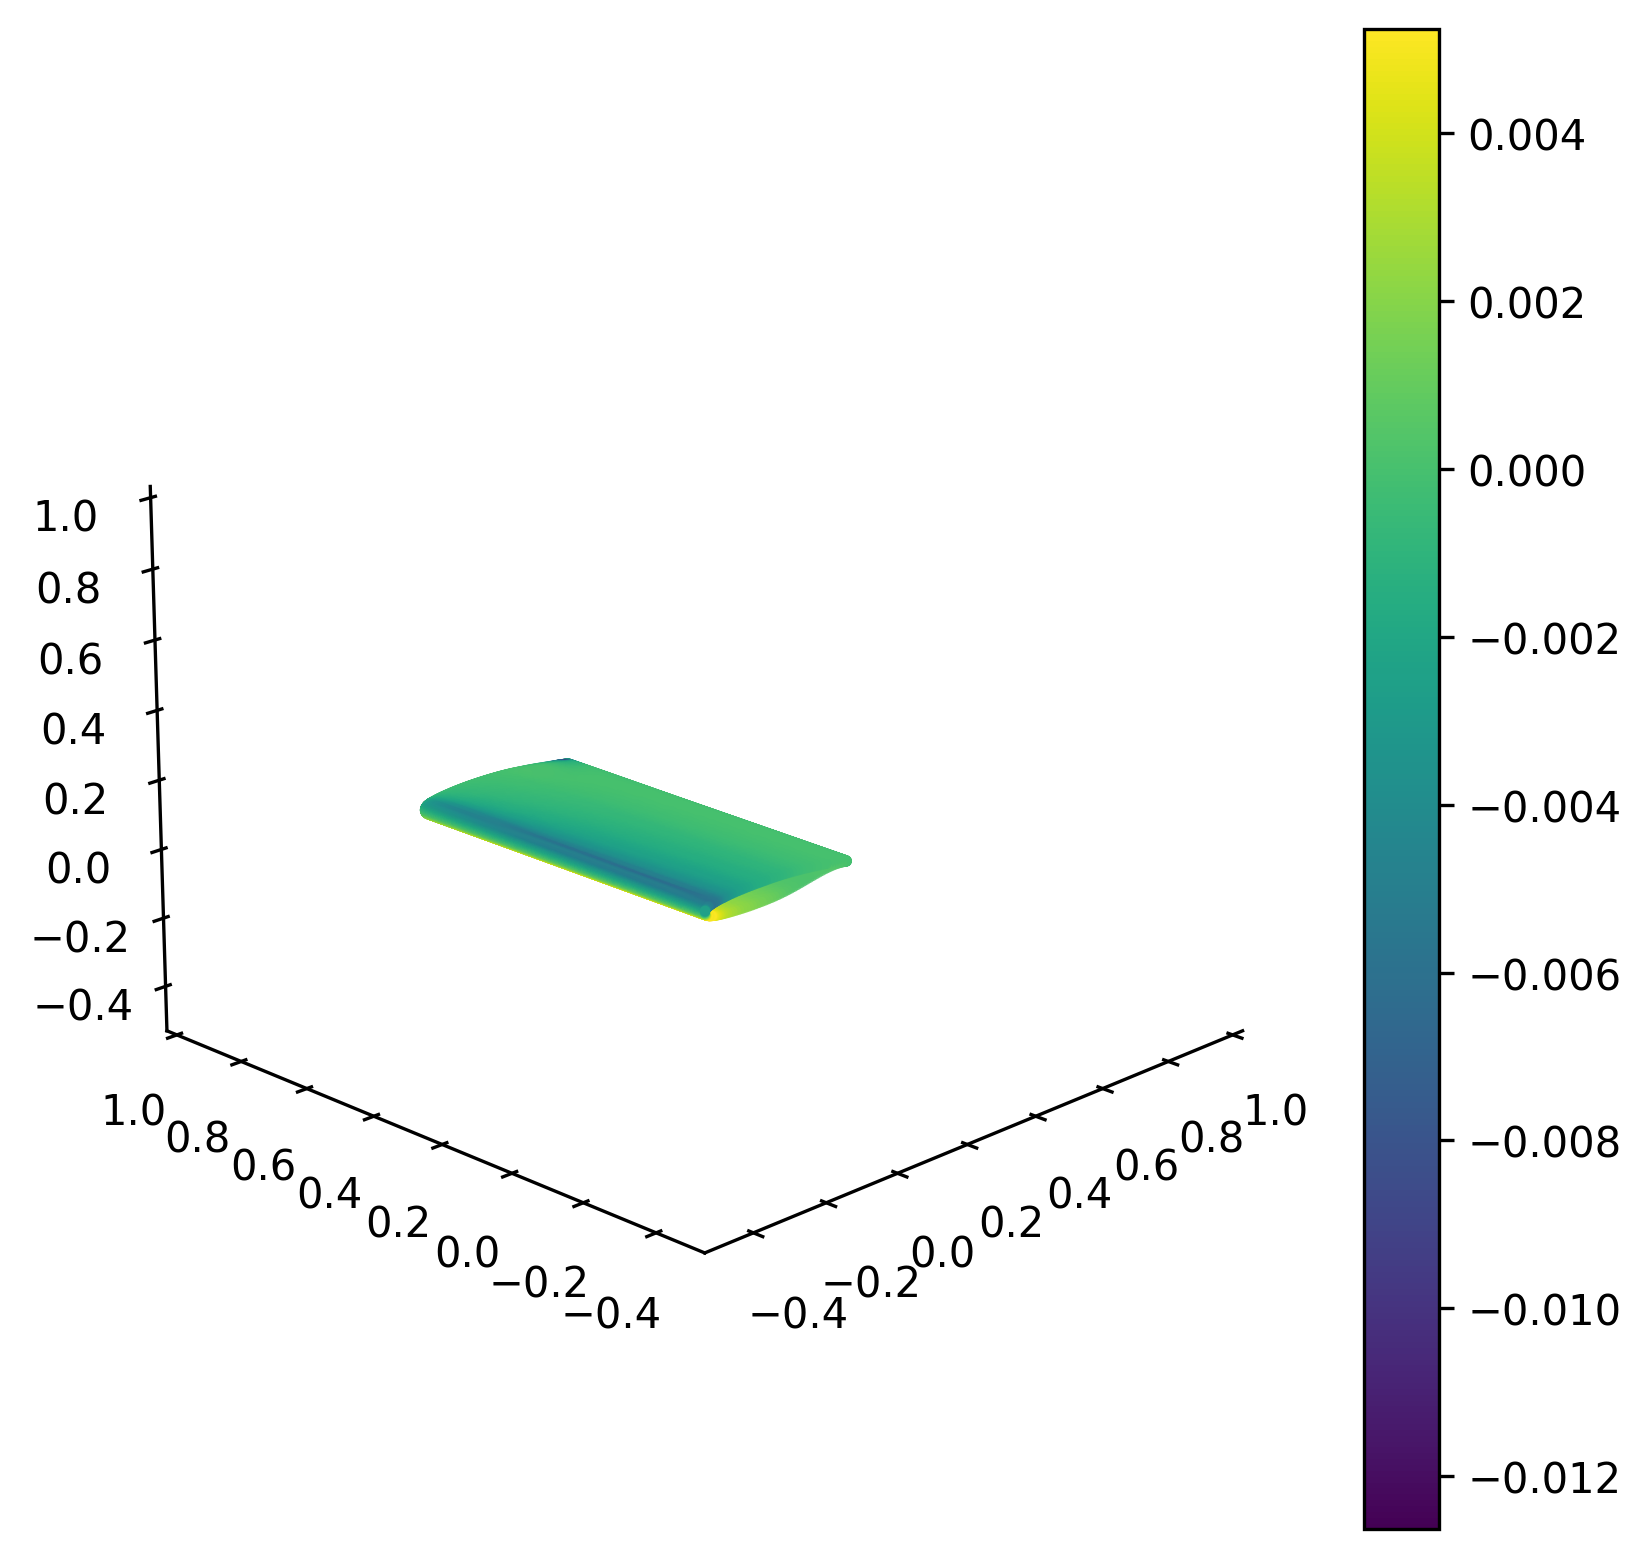

In [16]:
# We will now plot the first mode

sizeseq = 2

fig = plt.figure(1, (5,5), dpi=300)
ax = Axes3D(fig)
ax.view_init(20, 225)

# We use the undeformed shape to plot pressure on it
undeformedx = []
undeformedy = []
undeformedz = []
for i in range(len(model.undeformedShape)):
    undeformedx.append(model.undeformedShape[i].ux)
    undeformedy.append(model.undeformedShape[i].uy)
    undeformedz.append(model.undeformedShape[i].uz)

# If we want to plot other modes, we only have to change the index in c = U[:,index]
# Remember the python convention: first element has index 0
p = ax.scatter(undeformedx, undeformedy, undeformedz, c = U[:,0], s=sizeseq)

# Set the grid limits
ax.axes.set_xlim3d(left=-0.5, right=1) 
ax.axes.set_ylim3d(bottom=-0.5, top=1) 
ax.axes.set_zlim3d(bottom=-0.5, top=1)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Introduce the colorbar
fig.colorbar(p)

plt.show()

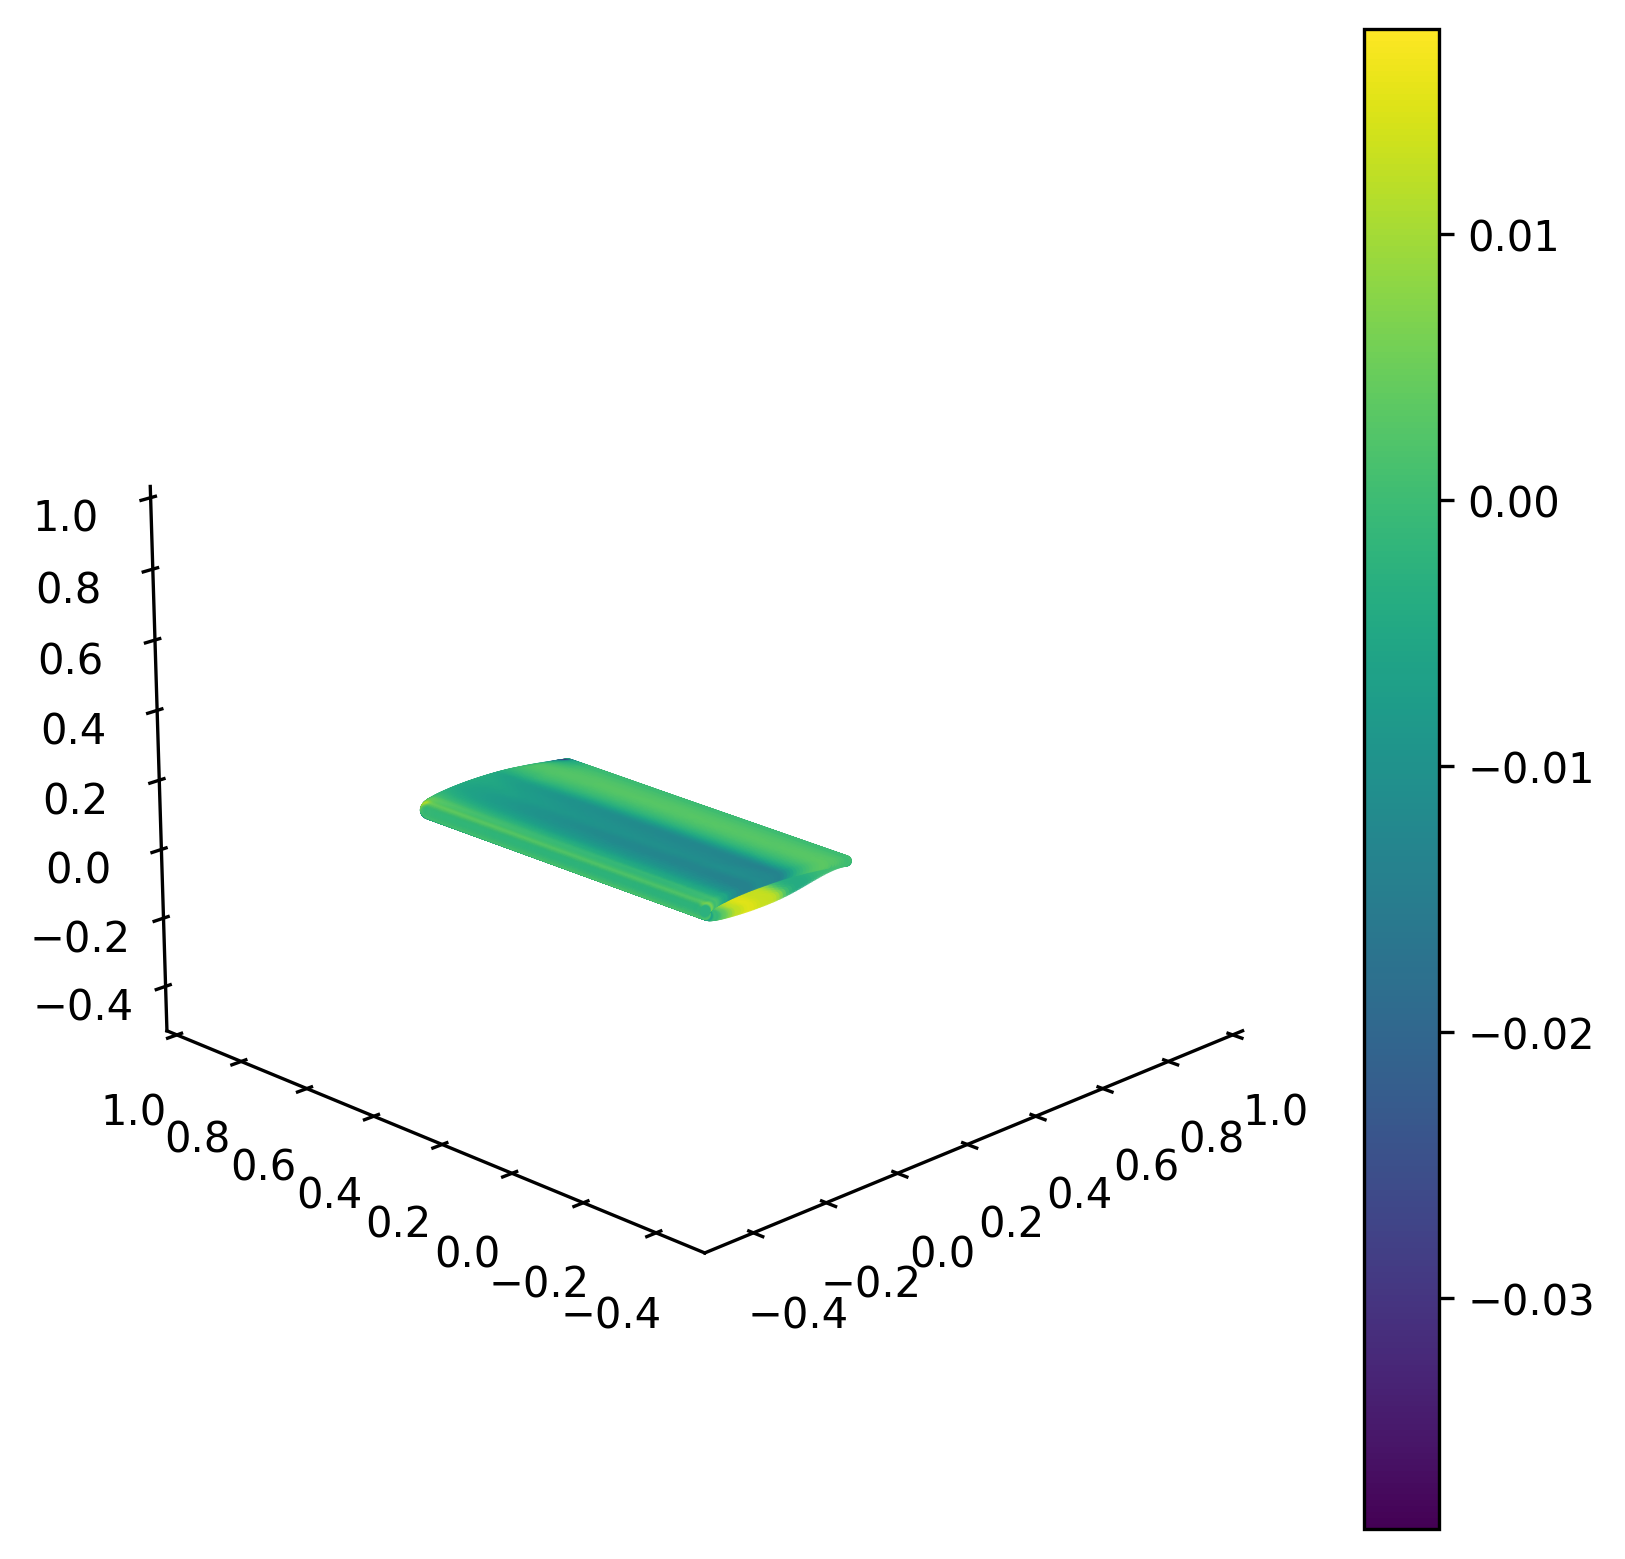

In [17]:
# We will now plot the second mode

sizeseq = 2

fig = plt.figure(1, (5,5), dpi=300)
ax = Axes3D(fig)
ax.view_init(20, 225)

# We use the undeformed shape to plot pressure on it
undeformedx = []
undeformedy = []
undeformedz = []
for i in range(len(model.undeformedShape)):
    undeformedx.append(model.undeformedShape[i].ux)
    undeformedy.append(model.undeformedShape[i].uy)
    undeformedz.append(model.undeformedShape[i].uz)

# If we want to plot other modes, we only have to change the index in c = U[:,index]
# Remember the python convention: first element has index 0
p = ax.scatter(undeformedx, undeformedy, undeformedz, c = -U[:,1], s=sizeseq)

# Set the grid limits
ax.axes.set_xlim3d(left=-0.5, right=1) 
ax.axes.set_ylim3d(bottom=-0.5, top=1) 
ax.axes.set_zlim3d(bottom=-0.5, top=1)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# Introduce the colorbar
fig.colorbar(p)

plt.show()